## A simple example usage of Linear Regression applied to Salary dataset

In [23]:
# Import Libraries.

import mlpack
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Set Plotting Options

In [24]:
%matplotlib inline
# Uncomment below line to enable dark background style sheet.
# plt.style.use('dark_background')

In [25]:
# Load the salary dataset.
data = pd.read_csv("Salary_Data.csv")

In [26]:
# Display the first 5 samples from dataframe.
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [27]:
# Generates basic statistical summary of the dataframe.
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [28]:
# Generates a concise summary of the dataframe.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


### Exploratory Data Analysis

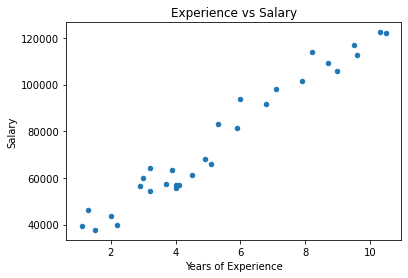

In [29]:
# Scatter plot of Experience vs Salary.
data.plot(x="YearsExperience", y="Salary",
          kind="scatter", title="Experience vs Salary")
plt.xlabel("Years of Experience")
plt.show()

### Train test split

In [30]:
# Split data into features (X) and targets (y).

targets = data.Salary
features = data.drop("Salary", axis=1)

In [31]:
# Split the dataset using mlpack's preprocess_split method.
output = mlpack.preprocess_split(input=features, input_labels=targets, test_ratio=0.4, seed=101)

In [32]:
# Preprocess_split returns a dictionary, which we'll unpack into
# respective variables for clarity of code.
X_train = output["training"]
y_train = output["training_labels"]
X_test = output["test"]
y_test = output["test_labels"]

### Training the linear model

In [42]:
# Create and train Linear Regression model.
output = mlpack.linear_regression(training=X_train,
                                  training_responses=y_train, 
                                  lambda_=0.5, verbose=True)

In [43]:
model = output["output_model"]

### Making Predictions on Test set

In [44]:
# Predict the values of the test data.
output = mlpack.linear_regression(input_model=model, test=X_test)

In [45]:
y_preds = output["output_predictions"].reshape(-1, 1)

### Model Evaluation

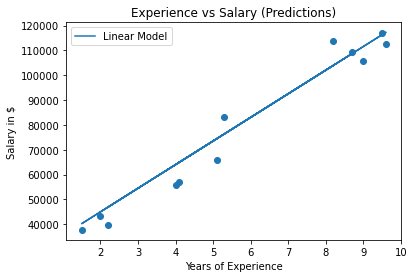

In [46]:
# Plot the linear model.

plt.scatter(X_test, y_test)
plt.xlabel("Years of Experience")
plt.ylabel("Salary in $")
plt.title("Experience vs Salary (Predictions)")
plt.plot(X_test, y_preds)
plt.legend(["Linear Model"])
plt.show()

## Evaluation Metrics for Regression model

* Mean Absolute Error (MAE) is the sum of absolute differences between actual and predicted values, without considering the direction.
$$ MAE = \frac{\sum_{i=1}^n\lvert y_{i} - \hat{y_{i}}\rvert} {n} $$
* Mean Squared Error (MSE) is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset, a lower value is better
$$ MSE = \frac {1}{n} \sum_{i=1}^n (y_{i} - \hat{y_{i}})^2 $$
* Root Mean Squared Error (RMSE), Square root of MSE yields root mean square error (RMSE) it indicates the spread of the residual errors. It is always positive, and a lower value indicates better performance.
$$ RMSE = \sqrt{\frac {1}{n} \sum_{i=1}^n (y_{i} - \hat{y_{i}})^2} $$

In [38]:
# Utility functions for evaulation metrics.

def mae(y_true, y_preds):
    return np.mean(np.abs(y_preds - y_true))

def mse(y_true, y_preds):
    return np.mean(np.power(y_preds - y_true, 2))

In [39]:
print("---- Evaluation Metrics ----")
print(f"Mean Absoulte Error: {mae(y_test, y_preds):.2f}")
print(f"Mean Squared Error: {mse(y_test, y_preds):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mse(y_test, y_preds)):.2f}")

---- Evaluation Metrics ----
Mean Absoulte Error: 5341.51
Mean Squared Error: 38284079.88
Root Mean Squared Error: 6187.41
